In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

## Hypothesis Generation
Some factors which I can think of that directly influence house prices are the following:

- Location of house
- Area of house
- Floors in the house
- Age of house
- Proximity to market, school, hospital, parks
- Availability of public transport
- Water / Electricity availability
- Car parking
- What material is used in the construction
- If terrace is available
- If security is available

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


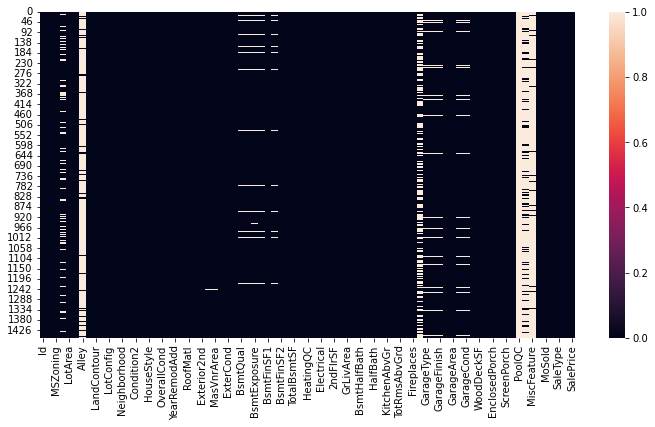

In [3]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.show()

## Numerical features analysis:

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_numerical = df.select_dtypes(include=['int64','float64'])
df_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
df_numerical.isna().any()

Id               False
MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

<AxesSubplot:>

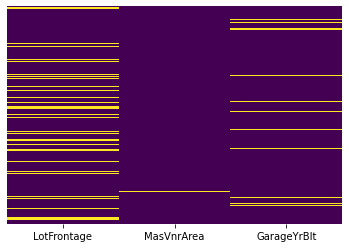

In [7]:
df_uncomplete_numerical = df_numerical[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]
sns.heatmap(df_uncomplete_numerical.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df_complete_numerical = df_numerical.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1)
df_complete_numerical.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# DROP features about the basement
df_complete_numerical = df_complete_numerical.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis = 1)
# total porch area
df_complete_numerical['PorchArea'] = df_complete_numerical['EnclosedPorch'] + df_complete_numerical['ScreenPorch'] + df_complete_numerical['3SsnPorch'] + df_complete_numerical['WoodDeckSF'] + df_complete_numerical['OpenPorchSF']
df_complete_numerical = df_complete_numerical.drop(['3SsnPorch','EnclosedPorch','ScreenPorch', 'WoodDeckSF', 'OpenPorchSF'], axis = 1)
# total number of bathroom
df_complete_numerical['TotalBathrooms'] = df_complete_numerical['FullBath'] + df_complete_numerical['HalfBath'] + df_complete_numerical['BsmtFullBath'] + df_complete_numerical['BsmtHalfBath']
df_complete_numerical = df_complete_numerical.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'], axis = 1)
# drop above area info and keep only total above area
df_complete_numerical = df_complete_numerical.drop(['BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd'], axis = 1)
# drop ids
df_complete_numerical = df_complete_numerical.drop(['Id'], axis = 1)
# drop Mosold Yr sold and miscval
df_complete_numerical = df_complete_numerical.drop(['MiscVal','MoSold', 'YrSold', 'MSSubClass', 'OverallCond'], axis = 1)
# create has_pool
df_complete_numerical = df_complete_numerical.drop(['PoolArea'], axis = 1)
# add masonry area infos
df_complete_numerical['MasVnrArea'] = df_uncomplete_numerical['MasVnrArea'].fillna(0)

<AxesSubplot:>

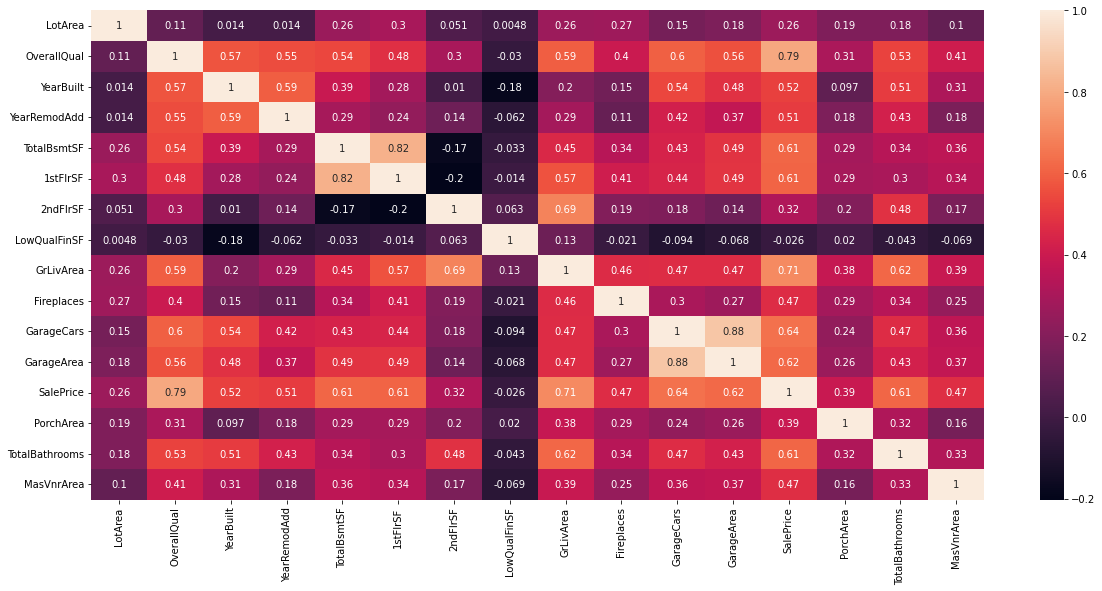

In [10]:
corr = df_complete_numerical.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

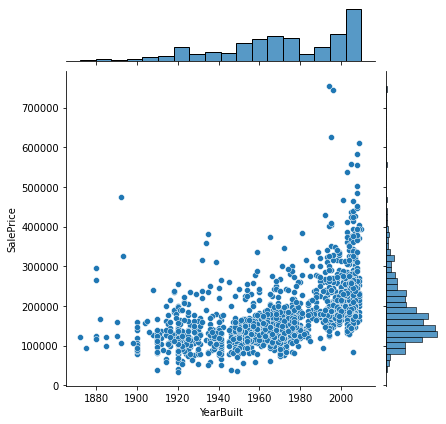

In [11]:
sns.jointplot(x='YearBuilt',y='SalePrice',data=df_complete_numerical,kind='scatter')

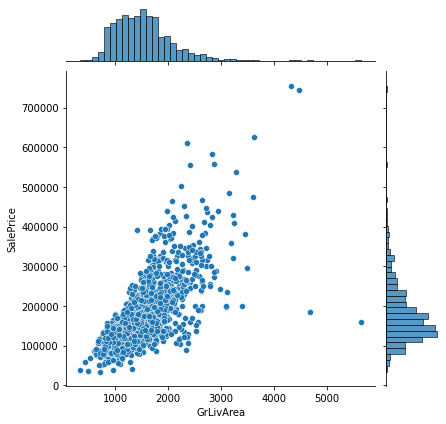

In [12]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=df_complete_numerical,kind='scatter')

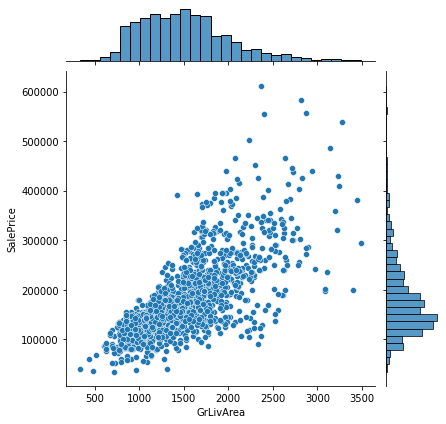

In [13]:
# remove outliers from above
df_complete_numerical.drop(df_complete_numerical[df_complete_numerical['GrLivArea'] > 3500].index, inplace=True)
sns.jointplot(x='GrLivArea',y='SalePrice',data=df_complete_numerical,kind='scatter')

/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

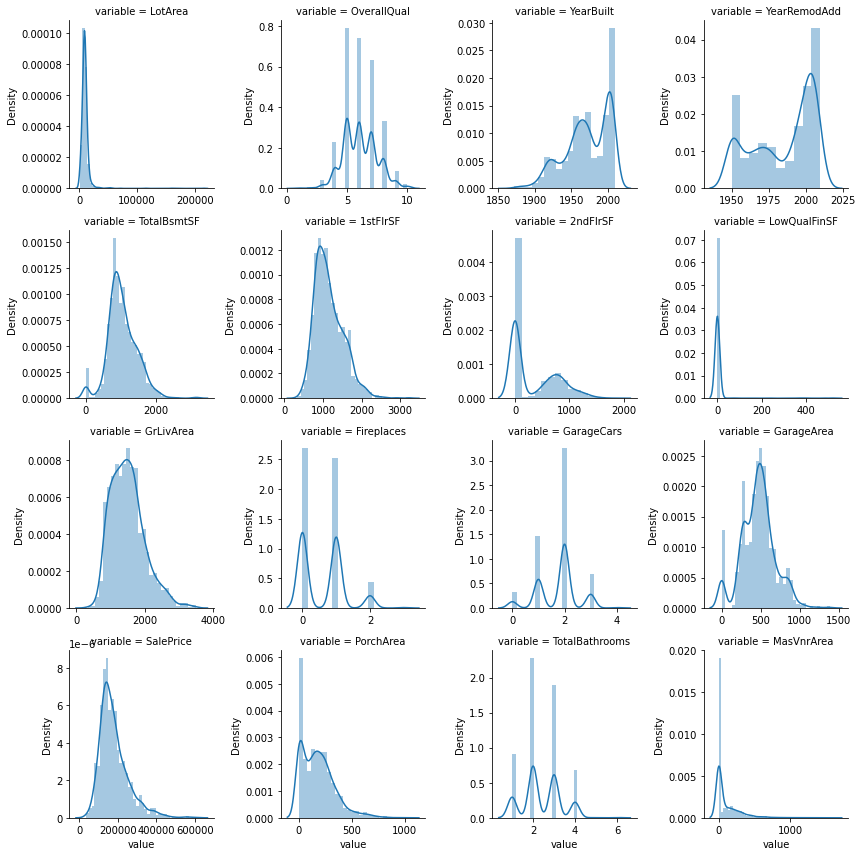

In [14]:
# Skewness removal
num_vars = [f for f in df_complete_numerical.columns]
nd = pd.melt(df_complete_numerical, value_vars = num_vars)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

## log trasformation of skew variables

Skewness is 1.4844382396006681


/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


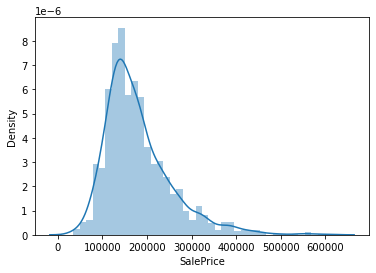

In [15]:
sns.distplot(df_complete_numerical['SalePrice'])
print ('Skewness is', df_complete_numerical['SalePrice'].skew())

Skewness is 0.039919512302681544


/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

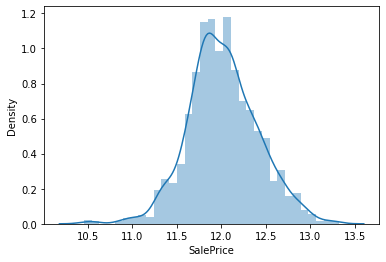

In [16]:
df_complete_numerical['SalePrice'] = np.log(df_complete_numerical['SalePrice'])
print ('Skewness is', df_complete_numerical['SalePrice'].skew())
sns.distplot(df_complete_numerical['SalePrice'])

Skewness is 0.7749077572858002


/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


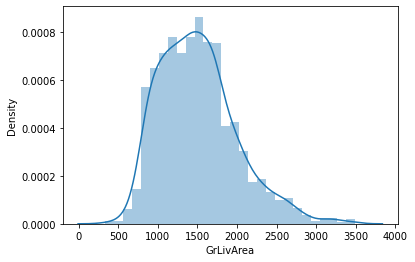

In [17]:
sns.distplot(df_complete_numerical['GrLivArea'])
print ('Skewness is', df_complete_numerical['GrLivArea'].skew())

Skewness is -0.1364504758275081


/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

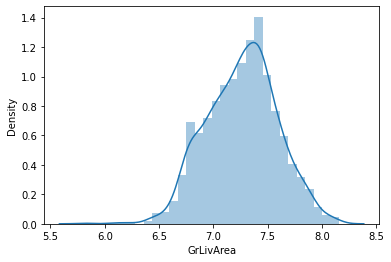

In [18]:
df_complete_numerical['GrLivArea'] = np.log(df_complete_numerical['GrLivArea'])
print ('Skewness is', df_complete_numerical['GrLivArea'].skew())
sns.distplot(df_complete_numerical['GrLivArea'])

Skewness is 0.8712845918451176


/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


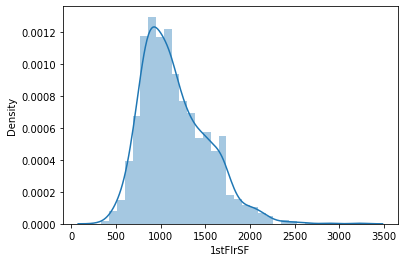

In [19]:
sns.distplot(df_complete_numerical['1stFlrSF'])
print ('Skewness is', df_complete_numerical['1stFlrSF'].skew())

Skewness is -0.0036290146864491695


/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

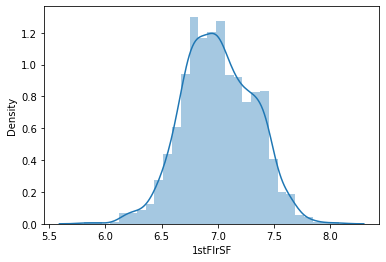

In [20]:
df_complete_numerical['1stFlrSF'] = np.log(df_complete_numerical['1stFlrSF'])
print ('Skewness is', df_complete_numerical['1stFlrSF'].skew())
sns.distplot(df_complete_numerical['1stFlrSF'])

## Categorical features analysis:

In [21]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'MasVnrType'),
  Text(2, 0, 'BsmtQual'),
  Text(3, 0, 'BsmtCond'),
  Text(4, 0, 'BsmtFinType1'),
  Text(5, 0, 'BsmtExposure'),
  Text(6, 0, 'BsmtFinType2'),
  Text(7, 0, 'GarageType'),
  Text(8, 0, 'GarageFinish'),
  Text(9, 0, 'GarageQual'),
  Text(10, 0, 'GarageCond'),
  Text(11, 0, 'FireplaceQu'),
  Text(12, 0, 'Fence'),
  Text(13, 0, 'Alley'),
  Text(14, 0, 'MiscFeature'),
  Text(15, 0, 'PoolQC')])

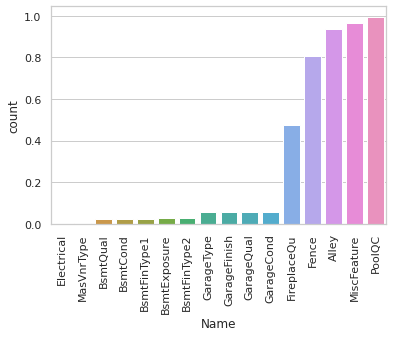

In [22]:
# check missing values
missing_values = df_categorical.isnull().sum() / len(df_categorical)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values
# dataframe of the missing values
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index
# plot
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)

In [23]:
# drop columns with a lot of missing values
df_categorical = df_categorical.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

In [24]:
# analyse 'electrical'
print(df_categorical['Electrical'].unique())
print(df_categorical['Electrical'].value_counts())
df_categorical['Electrical'] = df_categorical['Electrical'].fillna('SBrkr')

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [25]:
# analyse 'MasVnrType'
df_categorical['MasVnrType'] = df_categorical['MasVnrType'].fillna('None')
print(df_categorical['MasVnrType'].unique())
print(df_categorical['MasVnrType'].value_counts())

['BrkFace' 'None' 'Stone' 'BrkCmn']
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [26]:
# analyse 'Basement' related features
print(df_categorical['BsmtQual'].unique())
print(df_categorical['BsmtQual'].value_counts())
print(df_categorical['BsmtCond'].unique())
print(df_categorical['BsmtCond'].value_counts())
print(df_categorical['BsmtExposure'].unique())
print(df_categorical['BsmtExposure'].value_counts())

df_categorical['BsmtQual'] = df_categorical['BsmtQual'].fillna('TA')
df_categorical['BsmtCond'] = df_categorical['BsmtCond'].fillna('TA')
df_categorical['BsmtExposure'] = df_categorical['BsmtExposure'].fillna('No')

['Gd' 'TA' 'Ex' nan 'Fa']
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
['TA' 'Gd' nan 'Fa' 'Po']
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
['No' 'Gd' 'Mn' 'Av' nan]
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


In [27]:
# analyse 'Garage' related features
print(df_categorical['GarageQual'].unique())
print(df_categorical['GarageQual'].value_counts())
print(df_categorical['GarageCond'].unique())
print(df_categorical['GarageCond'].value_counts())
print(df_categorical['GarageFinish'].unique())
print(df_categorical['GarageFinish'].value_counts())
print(df_categorical['GarageType'].unique())
print(df_categorical['GarageType'].value_counts())

df_categorical['GarageQual'] = df_categorical['GarageQual'].fillna('TA')
df_categorical['GarageCond'] = df_categorical['GarageCond'].fillna('TA')
df_categorical['GarageType'] = df_categorical['GarageType'].fillna('Attchd')

['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
['RFn' 'Unf' 'Fin' nan]
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


In [28]:
# drop redundant/irrelevant
df_categorical = df_categorical.drop(['GarageFinish'], axis = 1)
df_categorical = df_categorical.drop(['BsmtFinType1', 'BsmtFinType2','Street', 'LandContour', 'Utilities', 'LotShape','LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'CentralAir', 'Functional', 'SaleType'], axis = 1)

## Label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label encoding basement
le.fit(df_categorical['BsmtQual'])
df_categorical['BsmtQual'] = le.transform(df_categorical['BsmtQual'])

le.fit(df_categorical['BsmtCond'])
df_categorical['BsmtCond'] = le.transform(df_categorical['BsmtCond'])

#label encoding garage
le.fit(df_categorical['GarageQual'])
df_categorical['GarageQual'] = le.transform(df_categorical['GarageQual'])

le.fit(df_categorical['GarageCond'])
df_categorical['GarageCond'] = le.transform(df_categorical['GarageCond'])

#label encoding Exterior infos
le.fit(df_categorical['ExterQual'])
df_categorical['ExterQual'] =le.transform(df_categorical['ExterQual'])

le.fit(df_categorical['ExterCond'])
df_categorical['ExterCond'] = le.transform(df_categorical['ExterCond'])

#label encoding 'Heating quality'
le.fit(df_categorical['HeatingQC'])
df_categorical['HeatingQC'] = le.transform(df_categorical['HeatingQC'])

#label encoding 'kitchen quality'
le.fit(df_categorical['KitchenQual'])
df_categorical['KitchenQual'] = le.transform(df_categorical['KitchenQual'])

## Hot encoding

In [30]:
# hot encode 'electrical'
electrical = pd.get_dummies(df_categorical['Electrical'], prefix = 'Elc', drop_first=True)
df_categorical = pd.concat([df_categorical, electrical], axis=1)
df_categorical.drop(['Electrical'], axis=1, inplace=True)

# hot encode 'MasVnrType'
masonry = pd.get_dummies(df_categorical['MasVnrType'], prefix = 'Mas', drop_first=True)
df_categorical = pd.concat([df_categorical, masonry], axis=1)
df_categorical.drop(['MasVnrType'], axis=1, inplace=True)

# hot encode 'Basement exposition'
basementexp = pd.get_dummies(df_categorical['BsmtExposure'], prefix = 'BsmE', drop_first=True)
df_categorical = pd.concat([df_categorical, basementexp], axis=1)
df_categorical.drop(['BsmtExposure'], axis=1, inplace=True)

# Hot encode 'Garage Type'
garagetype = pd.get_dummies(df_categorical['GarageType'], prefix = 'GrgT', drop_first=True)
df_categorical = pd.concat([df_categorical, garagetype], axis=1)
df_categorical.drop(['GarageType'], axis=1, inplace=True)

# hot encode 'MSZoning' (zone classification)
zoneinfo = pd.get_dummies(df_categorical['MSZoning'], prefix = 'Msz', drop_first=True)
df_categorical = pd.concat([df_categorical, zoneinfo], axis=1)
df_categorical.drop(['MSZoning'], axis=1, inplace=True)

# hot encode 'neighborhood'
neighborhood = pd.get_dummies(df_categorical['Neighborhood'], prefix = 'Ngbh', drop_first=True)
df_categorical = pd.concat([df_categorical, neighborhood], axis=1)
df_categorical.drop(['Neighborhood'], axis=1, inplace=True)

# hot encode 'BldgType' (type of building)
bldgtype = pd.get_dummies(df_categorical['BldgType'], prefix = 'BldT', drop_first=True)
df_categorical = pd.concat([df_categorical, bldgtype], axis=1)
df_categorical.drop(['BldgType'], axis=1, inplace=True)

# hot encode 'Foundation'
foundation = pd.get_dummies(df_categorical['Foundation'], prefix = 'Fnd', drop_first=True)
df_categorical = pd.concat([df_categorical, foundation], axis=1)
df_categorical.drop(['Foundation'], axis=1, inplace=True)

# hot encode 'paved drive'
pavedv = pd.get_dummies(df_categorical['PavedDrive'], prefix = 'PvDv', drop_first=True)
df_categorical = pd.concat([df_categorical, pavedv], axis=1)
df_categorical.drop(['PavedDrive'], axis=1, inplace=True)

# hot encode 'sale condition'
salecond = pd.get_dummies(df_categorical['SaleCondition'], prefix = 'SlC', drop_first=True)
df_categorical = pd.concat([df_categorical, salecond], axis=1)
df_categorical.drop(['SaleCondition'], axis=1, inplace=True)

In [31]:
DataFrame = pd.concat([df_complete_numerical, df_categorical], axis=1, sort=False)
DataFrame = DataFrame.dropna()
DataFrame

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,...,Fnd_Slab,Fnd_Stone,Fnd_Wood,PvDv_P,PvDv_Y,SlC_AdjLand,SlC_Alloca,SlC_Family,SlC_Normal,SlC_Partial
0,8450.0,7.0,2003.0,2003.0,856.0,6.752270,854.0,0.0,7.444249,0.0,...,0,0,0,0,1,0,0,0,1,0
1,9600.0,6.0,1976.0,1976.0,1262.0,7.140453,0.0,0.0,7.140453,1.0,...,0,0,0,0,1,0,0,0,1,0
2,11250.0,7.0,2001.0,2002.0,920.0,6.824374,866.0,0.0,7.487734,1.0,...,0,0,0,0,1,0,0,0,1,0
3,9550.0,7.0,1915.0,1970.0,756.0,6.867974,756.0,0.0,7.448334,1.0,...,0,0,0,0,1,0,0,0,0,0
4,14260.0,8.0,2000.0,2000.0,1145.0,7.043160,1053.0,0.0,7.695303,1.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917.0,6.0,1999.0,2000.0,953.0,6.859615,694.0,0.0,7.406711,1.0,...,0,0,0,0,1,0,0,0,1,0
1456,13175.0,6.0,1978.0,1988.0,1542.0,7.636752,0.0,0.0,7.636752,2.0,...,0,0,0,0,1,0,0,0,1,0
1457,9042.0,7.0,1941.0,2006.0,1152.0,7.080026,1152.0,0.0,7.757906,2.0,...,0,1,0,0,1,0,0,0,1,0
1458,9717.0,5.0,1950.0,1996.0,1078.0,6.982863,0.0,0.0,6.982863,0.0,...,0,0,0,0,1,0,0,0,1,0


## Train/Test Split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DataFrame.drop('SalePrice',axis=1), 
                                                    DataFrame['SalePrice'], test_size=0.30, 
                                                    random_state=101)

print('X_train:', len(X_train))
print('X_test:', len(X_test))
print('y_train:', len(y_train))
print('y_test:', len(y_test))

X_train: 1017
X_test: 437
y_train: 1017
y_test: 437


## Linear regression

MAE: 0.08691602530692115
MSE: 0.014357831826970023
RMSE: 0.11982417046226534
Accuracy -->  91.25281702241448


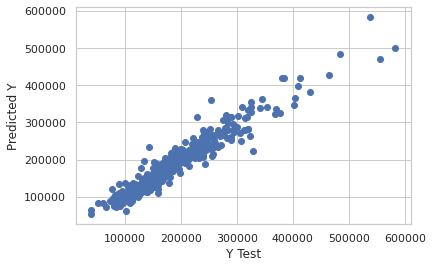

In [33]:

from sklearn.linear_model import LinearRegression
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
lm.fit(X_train,y_train)

from sklearn import metrics
predictions = lm.predict( X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.scatter(np.exp(y_test),np.exp(predictions))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
print("Accuracy --> ", lm.score(X_test, y_test)*100)

## LassoCV

MAE: 0.08644385514867678
MSE: 0.014096205610095962
RMSE: 0.11872744253160666
Accuracy -->  91.41220685357493


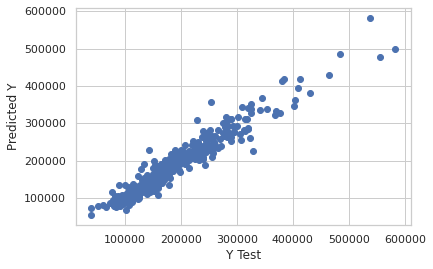

In [34]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(eps=1e-8)
lassocv.fit(X_train,y_train)
predictions = lassocv.predict( X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.scatter(np.exp(y_test),np.exp(predictions))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
print("Accuracy --> ", lassocv.score(X_test, y_test)*100)

## LassoLarsCV

/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to s

MAE: 0.0857087120768575
MSE: 0.013936239265304774
RMSE: 0.11805184990208656
Accuracy -->  91.50966271634076


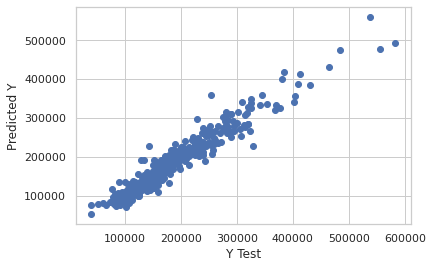

In [35]:
from sklearn.linear_model import LassoLarsCV
lassolarscv = LassoLarsCV(eps=1e-8)
lassolarscv.fit(X_train,y_train).fit(X_train,y_train)
predictions = lassolarscv.predict( X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.scatter(np.exp(y_test),np.exp(predictions))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
print("Accuracy --> ", lassolarscv.score(X_test, y_test)*100)

## ElasticNET

MAE: 0.08650510836870678
MSE: 0.014125659236909938
RMSE: 0.11885141663821235
Accuracy -->  91.39426290032347


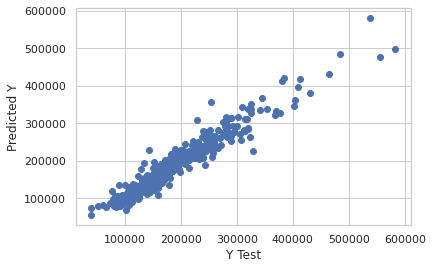

In [36]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(eps=1e-8)
elasticnetcv.fit(X_train,y_train)
predictions = elasticnetcv.predict( X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.scatter(np.exp(y_test),np.exp(predictions))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
print("Accuracy --> ", elasticnetcv.score(X_test, y_test)*100)

## GradientBoosting Regressor

MAE: 0.08422304220570045
MSE: 0.014887973600564418
RMSE: 0.12201628416143649
Accuracy -->  90.92984018624752


Text(0, 0.5, 'Predicted Y')

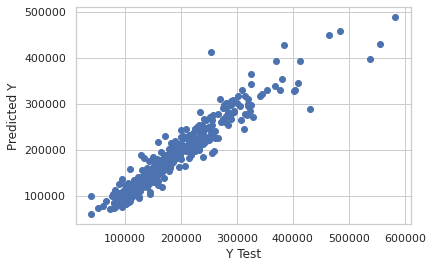

In [37]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(X_train, y_train)
#predict
predictions = GBR.predict( X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Score/Accuracy
print("Accuracy --> ", GBR.score(X_test, y_test)*100)
plt.scatter(np.exp(y_test),np.exp(predictions))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## XGBoost

XGBoost stands for Extreme Gradient Boosting. XGBoost is a specific implementation of the Gradient Boosting method which delivers more accurate approximations by using the strengths of second order derivative of the loss function, L1 and L2 regularization and parallel computing. XGBoost computes second-order gradients, i.e. second partial derivatives of the loss function, which provides more information about the direction of gradients and how to get to the minimum of our loss function.

XGBoost also handles missing values in the dataset. So, in data wrangling, you may or may not do a separate treatment for the missing values, because XGBoost is capable of handling missing values internally.

model choice of XGBoost: decision tree ensembles. The tree ensemble model consists of a set of classification and regression trees (CART).

A CART is a bit different from decision trees, in which the leaf only contains decision values. In CART, a real score is associated with each of the leaves, which gives us richer interpretations that go beyond classification.
Random Forests and Boosted Trees are really the same models; the difference arises from how we train them.

[14:30:02] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.09308767317264507
MSE: 0.01708023288460382
RMSE: 0.1306913649963295
Accuracy -->  89.5942560031411


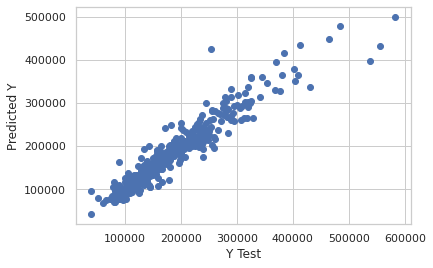

In [38]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train.values, y_train.values)

predictions = xgb_model.predict(X_test.values)

#predict
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Score/Accuracy
plt.scatter(np.exp(y_test),np.exp(predictions))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
print("Accuracy --> ", xgb_model.score(X_test.values, y_test.values)*100)


## K-Fold and retrain

In [39]:
from sklearn.model_selection import KFold

# Create K-fold cross-validation (K=10 here)  ---> XGboost

kf = KFold(n_splits=10, random_state=123, shuffle=True)
X = DataFrame.drop('SalePrice',axis=1).values
y = DataFrame['SalePrice'].values

MAE = []
MSE = []
RMSE= []
ACC = []    

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    xgb_model.fit(X_train, y_train)
    #predict
    predictions = xgb_model.predict(X_test)
    # store

    mae = metrics.mean_absolute_error(y_test, predictions)
    MAE.append(mae)
    
    mse = metrics.mean_squared_error(y_test, predictions)
    MSE.append(mse)
    
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    RMSE.append(rmse)
    
    acc = xgb_model.score(X_test, y_test)*100
    ACC.append(acc)
    print("Accuracy --> ", acc)
    
MAE = np.array(MAE)    
MSE = np.array(MSE)
RMSE = np.array(RMSE)
ACC = np.array(ACC)

print('\nMAE--> mean: ', MAE.mean(), "std: ", MAE.std())
print('MSE--> mean: ', MSE.mean(), "std: ", MSE.std())
print('RMSE--> mean: ', RMSE.mean(), "std: ", RMSE.std())
print('ACC--> mean: ', ACC.mean(), "std: ", ACC.std())

[14:30:02] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy -->  88.40064953290484
[14:30:02] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy -->  89.90511244717358
[14:30:03] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy -->  88.03325315054843
[14:30:03] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy -->  75.78911427192905
[14:30:03] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy -->  89.11706936573299
[14:30:03] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy -->  85.81201508156889
[14:30:04] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in fa

In [40]:
# Create K-fold cross-validation (K=10 here)  ---> GradientBoosting Regressor

kf = KFold(n_splits=10, random_state=123, shuffle=True)
X = DataFrame.drop('SalePrice',axis=1).values
y = DataFrame['SalePrice'].values

MAE = []
MSE = []
RMSE= []
ACC = []    

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    GBR.fit(X_train, y_train)
    #predict
    predictions = GBR.predict(X_test)
    # store

    
    mae = metrics.mean_absolute_error(y_test, predictions)
    MAE.append(mae)
    
    mse = metrics.mean_squared_error(y_test, predictions)
    MSE.append(mse)
    
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    RMSE.append(rmse)
    
    acc = GBR.score(X_test, y_test)*100
    ACC.append(acc)
    print("Accuracy --> ", acc)
    
MAE = np.array(MAE)    
MSE = np.array(MSE)
RMSE = np.array(RMSE)
ACC = np.array(ACC)

print('\nMAE--> mean: ', MAE.mean(), "std: ", MAE.std())
print('MSE--> mean: ', MSE.mean(), "std: ", MSE.std())
print('RMSE--> mean: ', RMSE.mean(), "std: ", RMSE.std())
print('ACC--> mean: ', ACC.mean(), "std: ", ACC.std())

Accuracy -->  90.36174333751717
Accuracy -->  90.18664090878327
Accuracy -->  89.33494199231704
Accuracy -->  75.78352277632432
Accuracy -->  89.78586508621721
Accuracy -->  89.7958182758923
Accuracy -->  88.28571969460661
Accuracy -->  89.21236337706081
Accuracy -->  88.85692506842105
Accuracy -->  93.3227767888929

MAE--> mean:  0.09105537889770983 std:  0.008963158115185749
MSE--> mean:  0.017362936261085628 std:  0.0052356394916184806
RMSE--> mean:  0.13028302385547788 std:  0.019729925396681516
ACC--> mean:  88.49263173060328 std:  4.427061859982598


In [41]:
# Create K-fold cross-validation (K=10 here)   # ---> linear regressor

kf = KFold(n_splits=10, random_state=123, shuffle=True)
X = DataFrame.drop('SalePrice',axis=1).values
y = DataFrame['SalePrice'].values

MAE = []
MSE = []
RMSE= []
ACC = []    

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lm.fit(X_train, y_train)
    #predict
    predictions = lm.predict(X_test)
    # store


    mae = metrics.mean_absolute_error(y_test, predictions)
    MAE.append(mae)
  
    mse = metrics.mean_squared_error(y_test, predictions)
    MSE.append(mse)
   
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    RMSE.append(rmse)

    acc = lm.score(X_test, y_test)*100
    ACC.append(acc)
    print("Accuracy --> ", acc)
    
MAE = np.array(MAE)    
MSE = np.array(MSE)
RMSE = np.array(RMSE)
ACC = np.array(ACC)

print('\nMAE--> mean: ', MAE.mean(), "std: ", MAE.std())
print('MSE--> mean: ', MSE.mean(), "std: ", MSE.std())
print('RMSE--> mean: ', RMSE.mean(), "std: ", RMSE.std())
print('ACC--> mean: ', ACC.mean(), "std: ", ACC.std())

Accuracy -->  90.72448181465569
Accuracy -->  88.65216630436421
Accuracy -->  90.7973994422563
Accuracy -->  82.20619639492604
Accuracy -->  90.25045054763076
Accuracy -->  90.90262546681977
Accuracy -->  87.84558944364565
Accuracy -->  91.27060066549389
Accuracy -->  93.32307364479828
Accuracy -->  91.35918875782748

MAE--> mean:  0.08874825123898608 std:  0.00821792925842113
MSE--> mean:  0.015336569385883469 std:  0.0027501459526164266
RMSE--> mean:  0.1233517897706879 std:  0.01099569671514644
ACC--> mean:  89.7331772482418 std:  2.881534103599621


In [42]:
# Create K-fold cross-validation (K=10 here)   # ---> lassoCV

kf = KFold(n_splits=10, random_state=123, shuffle=True)
X = DataFrame.drop('SalePrice',axis=1).values
y = DataFrame['SalePrice'].values

MAE = []
MSE = []
RMSE= []
ACC = []    

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lassocv.fit(X_train, y_train)
    #predict
    predictions = lassocv.predict(X_test)
    # store


    mae = metrics.mean_absolute_error(y_test, predictions)
    MAE.append(mae)
  
    mse = metrics.mean_squared_error(y_test, predictions)
    MSE.append(mse)
   
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    RMSE.append(rmse)

    acc = lassocv.score(X_test, y_test)*100
    ACC.append(acc)
    print("Accuracy --> ", acc)
    
MAE = np.array(MAE)    
MSE = np.array(MSE)
RMSE = np.array(RMSE)
ACC = np.array(ACC)

print('\nMAE--> mean: ', MAE.mean(), "std: ", MAE.std())
print('MSE--> mean: ', MSE.mean(), "std: ", MSE.std())
print('RMSE--> mean: ', RMSE.mean(), "std: ", RMSE.std())
print('ACC--> mean: ', ACC.mean(), "std: ", ACC.std())

Accuracy -->  90.75350417032374
Accuracy -->  89.07972469987786
Accuracy -->  90.63677456000867
Accuracy -->  81.69661057042278
Accuracy -->  90.30524111841143
Accuracy -->  90.84922301627485
Accuracy -->  87.86194870953099
Accuracy -->  91.2125666742599
Accuracy -->  93.00008208381836
Accuracy -->  92.77963383493031

MAE--> mean:  0.08875371135820881 std:  0.008758340593397189
MSE--> mean:  0.015240538163898176 std:  0.003108925808336725
RMSE--> mean:  0.12279282910691065 std:  0.012745951663929077
ACC--> mean:  89.8175309437859 std:  3.0662073210290535


In [43]:
# Create K-fold cross-validation (K=10 here)   # ---> lassoLarsCV

kf = KFold(n_splits=10, random_state=123, shuffle=True)
X = DataFrame.drop('SalePrice',axis=1).values
y = DataFrame['SalePrice'].values

MAE = []
MSE = []
RMSE= []
ACC = []    

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lassolarscv.fit(X_train, y_train)
    #predict
    predictions = lassolarscv.predict(X_test)
    # store


    mae = metrics.mean_absolute_error(y_test, predictions)
    MAE.append(mae)
  
    mse = metrics.mean_squared_error(y_test, predictions)
    MSE.append(mse)
   
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    RMSE.append(rmse)

    acc = lassolarscv.score(X_test, y_test)*100
    ACC.append(acc)
    print("Accuracy --> ", acc)
    
MAE = np.array(MAE)    
MSE = np.array(MSE)
RMSE = np.array(RMSE)
ACC = np.array(ACC)

print('\nMAE--> mean: ', MAE.mean(), "std: ", MAE.std())
print('MSE--> mean: ', MSE.mean(), "std: ", MSE.std())
print('RMSE--> mean: ', RMSE.mean(), "std: ", RMSE.std())
print('ACC--> mean: ', ACC.mean(), "std: ", ACC.std())

Accuracy -->  90.88937117961625


/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to s

Accuracy -->  89.07588453910293
Accuracy -->  90.65282531515605


/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to s

Accuracy -->  81.74839186800256
Accuracy -->  90.00532703207075


/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to s

Accuracy -->  90.70686680121956
Accuracy -->  87.89164271344238


/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to s

Accuracy -->  91.26277290512131
Accuracy -->  91.48834405804732


/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/davide/Desktop/Network_conversion_venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to s

Accuracy -->  92.23840378690149

MAE--> mean:  0.08934637008245432 std:  0.008499976882715863
MSE--> mean:  0.015645952937490274 std:  0.0030130299192163653
RMSE--> mean:  0.12448766200679706 std:  0.012197333543513794
ACC--> mean:  89.59598301986806 std:  2.8686750494256485


In [44]:
# Create K-fold cross-validation (K=10 here)   # ---> ElasticNet

kf = KFold(n_splits=10, random_state=123, shuffle=True)
X = DataFrame.drop('SalePrice',axis=1).values
y = DataFrame['SalePrice'].values

MAE = []
MSE = []
RMSE= []
ACC = []    

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    elasticnetcv.fit(X_train, y_train)
    #predict
    predictions = elasticnetcv.predict(X_test)
    # store


    mae = metrics.mean_absolute_error(y_test, predictions)
    MAE.append(mae)
  
    mse = metrics.mean_squared_error(y_test, predictions)
    MSE.append(mse)
   
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    RMSE.append(rmse)

    acc = elasticnetcv.score(X_test, y_test)*100
    ACC.append(acc)
    print("Accuracy --> ", acc)
    
MAE = np.array(MAE)    
MSE = np.array(MSE)
RMSE = np.array(RMSE)
ACC = np.array(ACC)

print('\nMAE--> mean: ', MAE.mean(), "std: ", MAE.std())
print('MSE--> mean: ', MSE.mean(), "std: ", MSE.std())
print('RMSE--> mean: ', RMSE.mean(), "std: ", RMSE.std())
print('ACC--> mean: ', ACC.mean(), "std: ", ACC.std())

Accuracy -->  90.75073825831575
Accuracy -->  89.16382441233421
Accuracy -->  90.6241277553579
Accuracy -->  81.66153786955408
Accuracy -->  90.33461917563704
Accuracy -->  90.88971038145434
Accuracy -->  87.85490280236746
Accuracy -->  91.19618364107839
Accuracy -->  92.92655633827735
Accuracy -->  92.6831623635078

MAE--> mean:  0.08878513338592546 std:  0.008728772498915434
MSE--> mean:  0.015255463526959296 std:  0.003086654221843504
RMSE--> mean:  0.12286624025918307 std:  0.012623412040014869
ACC--> mean:  89.80853629978843 std:  3.0580327717817415
